## Week 3 (김태영, 주세연, 채윤병)

### 1. SMOTE와 ADASYN에서 K-neighborgs를 조절하여 변화에 대해 설명
### 2. Random Under Sampling, Rnadom Over Sampling기법을 사용했을 때와 비교

### 조건 : LDA, QDA, NB 분류모델 사용 / 시각적 분석

In [1]:
!pip install -U imbalanced-learn

In [2]:
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.under_sampling import *
from imblearn.over_sampling import *
from sklearn import preprocessing
from collections import Counter
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

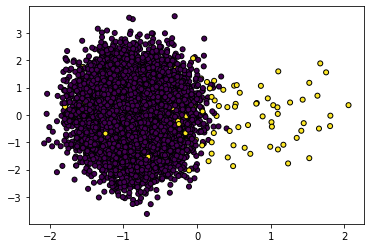

In [3]:
X1, Y1 = make_classification(n_samples=10000, weights=[0.99],  n_clusters_per_class = 1, random_state = 2021 )
plt.scatter(X1[:, 0]  , X1[:, 1], marker='o', c=Y1, s=25, edgecolor='k')
plt.show()
counter=Counter(Y1)

In [4]:
X1_train, X1_test, Y1_train, Y1_test=train_test_split(X1, Y1, test_size=0.3)

In [5]:
scaler=preprocessing.StandardScaler()

X1_train=scaler.fit_transform(X1_train)
X1_test=scaler.fit_transform(X1_test)

### 1. 모델별 정확도 비교(before sampling)

In [6]:
! pip3 install mlxtend

In [7]:
nb = GaussianNB()
lda =  LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()

In [8]:
from mlxtend.plotting import plot_decision_regions

Text(0.5, 1.0, 'NB decision region boundary (2 class)')

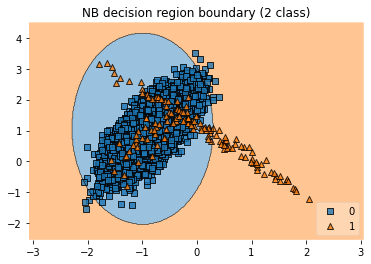

In [9]:
X12 = X1[:,[0,2]]  
nb.fit(X12,Y1)

plot_decision_regions(X12,Y1,clf=nb,legend=4)
plt.title('NB decision region boundary (2 class)')

Text(0.5, 1.0, 'LDA decision region boundary (2 class)')

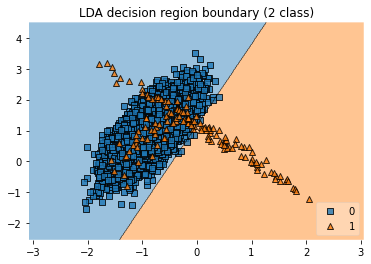

In [10]:
lda.fit(X12, Y1)
plot_decision_regions(X12,Y1,clf=lda,legend=4)
plt.title('LDA decision region boundary (2 class)')

Text(0.5, 1.0, 'QDA decision region boundary (2 class)')

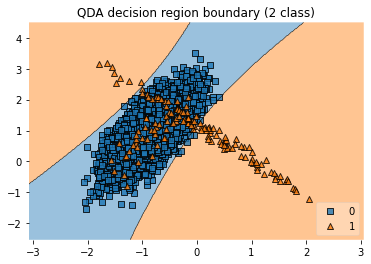

In [11]:
qda.fit(X12, Y1)
plot_decision_regions(X12,Y1,clf=qda,legend=4)
plt.title('QDA decision region boundary (2 class)')

In [19]:
skfolds = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

a1 = np.average(cross_val_score(nb,X1_train,Y1_train,cv = skfolds))
a2 = np.average(cross_val_score(lda,X1_train,Y1_train,cv = skfolds))
a3 = np.average(cross_val_score(qda,X1_train,Y1_train,cv = skfolds))
print('GaussianNB accuracy : ' + str(a1) + '  LDA accuracy : '+ str(a2) + '  QDA accuracy: ' + str(a3)  )

GaussianNB accuracy : 0.9781428571428572  LDA accuracy : 0.991  QDA accuracy: 0.8657142857142859


C:\Users\82104\anaconda\envs\ana\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\82104\anaconda\envs\ana\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\82104\anaconda\envs\ana\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\82104\anaconda\envs\ana\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\82104\anaconda\envs\ana\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


## 2. SMOTE(GuasssinNB with change of k)

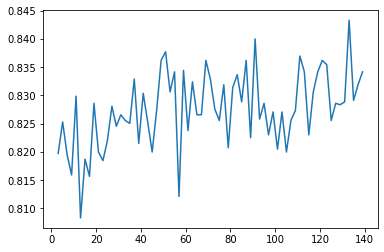

In [17]:
k_values = []
scores = []
for k in range(3,140,2):
    smote = SMOTE(k_neighbors = k)
    X1_os, Y1_os = smote.fit_resample(X1,Y1)
    X1_os_train, X1_os_test, Y1_os_train, Y1_os_test = train_test_split(X1_os, Y1_os, test_size = 0.2)
    
    model = GaussianNB()
    X1_os_train = scaler.fit_transform(X1_os_train)
    X1_os_test = scaler.fit_transform(X1_os_test)
    
    model.fit(X1_os_train, Y1_os_train)
    score = model.score(X1_os_test, Y1_os_test)
    scores.append(score)
    k_values.append(k)

plt.plot(k_values, scores)

In [20]:
np.max(scores)

0.8433062880324543

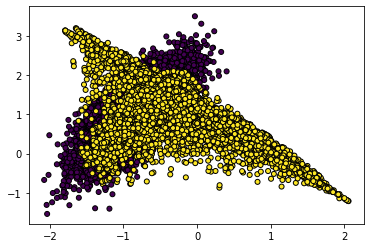

In [22]:
oversample = SMOTE(k_neighbors = k_values[np.argmax(scores)])
X1_os, Y1_os = oversample.fit_resample(X1,Y1)
plt.scatter(X1_os[:, 0]  , X1_os[:, 2], marker='o', c=Y1_os, s=25, edgecolor='k')
plt.show()

## 2. ADASYN(GuasssinNB with change of k)

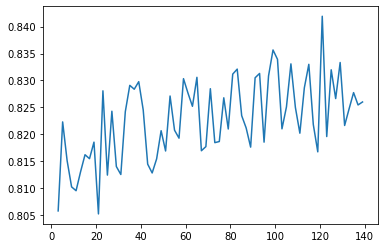

In [31]:
k_values2 = []
scores2 = []
for k in range(3,140,2):
    adasyn = ADASYN(n_neighbors = k)
    X1_os2, Y1_os2 = adasyn.fit_resample(X1,Y1)
    X1_os2_train, X1_os2_test, Y1_os2_train, Y1_os2_test = train_test_split(X1_os2, Y1_os2, test_size = 0.2)
    
    model = GaussianNB()
    X1_os2_train = scaler.fit_transform(X1_os2_train)
    X1_os2_test = scaler.fit_transform(X1_os2_test)
    
    model.fit(X1_os2_train, Y1_os2_train)
    score2 = model.score(X1_os2_test, Y1_os2_test)
    scores2.append(score2)
    k_values2.append(k)

plt.plot(k_values2, scores2)

In [32]:
np.max(scores2)

0.8419052444894857

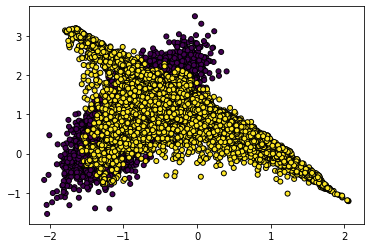

In [33]:
oversample2 = ADASYN(n_neighbors = k_values2[np.argmax(scores2)])
X1_os2, Y1_os2 = oversample2.fit_resample(X1,Y1)
plt.scatter(X1_os2[:, 0]  , X1_os2[:, 2], marker='o', c=Y1_os2, s=25, edgecolor='k')
plt.show()

## 3. Random Over Sampling(LDA,QDA, NB)

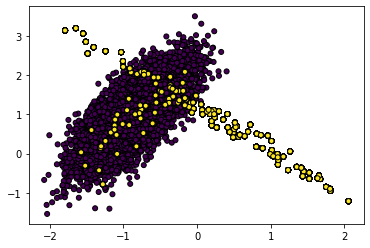

In [65]:
oversample3 = RandomOverSampler()
X1_os3, Y1_os3 = oversample3.fit_resample(X1,Y1)
plt.scatter(X1_os3[:, 0]  , X1_os3[:, 2], marker='o', c=Y1_os3, s=25, edgecolor='k')
plt.show()

In [68]:
X1_os3_train, X1_os3_test, Y1_os3_train, Y1_os3_test = train_test_split(X1_os3, Y1_os3, test_size = 0.2)
    
X1_os3_train = scaler.fit_transform(X1_os3_train)
X1_os3_test = scaler.fit_transform(X1_os3_test)

nb.fit(X1_os3_train, Y1_os3_train)
lda.fit(X1_os3_train, Y1_os3_train)
qda.fit(X1_os3_train, Y1_os3_train)

C:\Users\82104\anaconda\envs\ana\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

In [71]:
acc1 = nb.score(X1_os3_test, Y1_os3_test)
acc2 = lda.score(X1_os3_test, Y1_os3_test)
acc3 = qda.score(X1_os3_test, Y1_os3_test)

print('GaussianNB accuracy : ' + str(acc1) + '  LDA accuracy : '+ str(acc2) + '  QDA accuracy: ' + str(acc3)  )

GaussianNB accuracy : 0.7834685598377282  LDA accuracy : 0.7507606490872211  QDA accuracy: 0.5050709939148073


## 3. Random Over Sampling(LDA,QDA, NB)

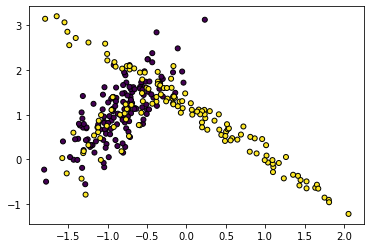

In [72]:
undersample = RandomUnderSampler()
X1_us, Y1_us = undersample.fit_resample(X1,Y1)
plt.scatter(X1_us[:, 0]  , X1_us[:, 2], marker='o', c=Y1_us, s=25, edgecolor='k')
plt.show()

In [75]:
X1_us_train, X1_us_test, Y1_us_train, Y1_us_test = train_test_split(X1_us, Y1_us, test_size = 0.2)
    
X1_us_train = scaler.fit_transform(X1_us_train)
X1_us_test = scaler.fit_transform(X1_us_test)

nb.fit(X1_us_train, Y1_us_train)
lda.fit(X1_us_train, Y1_us_train)
qda.fit(X1_us_train, Y1_us_train)

C:\Users\82104\anaconda\envs\ana\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

In [77]:
accu1 = nb.score(X1_us_test, Y1_us_test)
accu2 = lda.score(X1_us_test, Y1_us_test)
accu3 = qda.score(X1_us_test, Y1_us_test)

print('GaussianNB accuracy : ' + str(accu1) + '  LDA accuracy : '+ str(accu2) + '  QDA accuracy: ' + str(accu3)  )

GaussianNB accuracy : 0.7719298245614035  LDA accuracy : 0.7894736842105263  QDA accuracy: 0.43859649122807015
